In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
from pathlib import Path

## Launch the UI with:
`
mlflow ui --backend-store-uri sqlite:///mlflow.db -h 0.0.0.0
`

In [10]:
current_dir = Path('.').resolve()


mlflow_db=(Path(current_dir) / 'mlflow.db').resolve()
str(mlflow_db)

'/home/alex/python_projects/course_mlops/mlops-homework/02_mlflow/mlflow.db'

In [11]:
data_dir = (current_dir.parent / 'data').resolve()
data_dir

PosixPath('/home/alex/python_projects/course_mlops/mlops-homework/data')

In [12]:
mlflow.set_tracking_uri(f'sqlite:///{mlflow_db}')
mlflow.set_experiment('nyc-taxi-experiment')


<Experiment: artifact_location='/home/alex/python_projects/course_mlops/mlops-homework/02_mlflow/mlruns/1', creation_time=1747867498420, experiment_id='1', last_update_time=1747867498420, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [13]:
pd.__version__

'2.2.3'

In [14]:
#df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
df=pd.read_parquet(data_dir / 'yellow_tripdata_2024-01.parquet')

In [15]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [16]:
df=df[df.RatecodeID<2.0]

In [17]:
df.RatecodeID.describe()

count    2663350.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: RatecodeID, dtype: float64

In [18]:
df.passenger_count.describe()

count    2.663350e+06
mean     1.332577e+00
std      8.487142e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

## Selecting 100K random records

In [95]:
df = df.sample(n=100000, random_state=42)

In [25]:
df['duration'] = df.tpep_dropoff_datetime- df.tpep_pickup_datetime

/tmp/ipykernel_1514542/592272650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df.tpep_dropoff_datetime- df.tpep_pickup_datetime


In [26]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

/tmp/ipykernel_1514542/908612035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [23]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,N,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75
2824458,2,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,N,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00
2824459,1,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,N,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00
2824460,1,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,N,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00


In [99]:
#td.total_seconds() / 60

/tmp/ipykernel_515087/3574543220.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


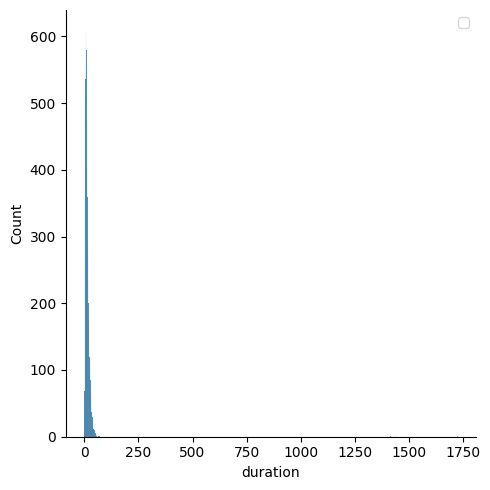

In [100]:
sns.displot(df.duration)
plt.legend()

In [27]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    2.663350e+06
mean     1.413163e+01
std      3.483445e+01
min      0.000000e+00
50%      1.110000e+01
95%      3.078333e+01
98%      3.900000e+01
99%      4.565000e+01
max      9.455400e+03
Name: duration, dtype: float64

In [28]:
df = df[(df.duration >=1) & (df.duration <=60)]

In [29]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [30]:
df[categorical]=df[categorical].astype(str)

/tmp/ipykernel_1514542/2220226503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical]=df[categorical].astype(str)


In [121]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

In [31]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [32]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '186', 'DOLocationID': '79', 'trip_distance': 1.72},
 {'PULocationID': '140', 'DOLocationID': '236', 'trip_distance': 1.8},
 {'PULocationID': '236', 'DOLocationID': '79', 'trip_distance': 4.7},
 {'PULocationID': '79', 'DOLocationID': '211', 'trip_distance': 1.4},
 {'PULocationID': '211', 'DOLocationID': '148', 'trip_distance': 0.8},
 {'PULocationID': '148', 'DOLocationID': '141', 'trip_distance': 4.7},
 {'PULocationID': '138', 'DOLocationID': '181', 'trip_distance': 10.82},
 {'PULocationID': '246', 'DOLocationID': '231', 'trip_distance': 3.0},
 {'PULocationID': '161', 'DOLocationID': '261', 'trip_distance': 5.44},
 {'PULocationID': '113', 'DOLocationID': '113', 'trip_distance': 0.04}]

In [33]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [125]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [126]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29715 stored elements and shape (9905, 285)>

In [127]:
target='duration'
y_train = df[target].values

In [128]:
y_train

array([ 7.2       , 17.31666667,  2.58333333, ..., 12.25      ,
       12.11666667, 36.28333333])

In [129]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = lr.predict(X_train)

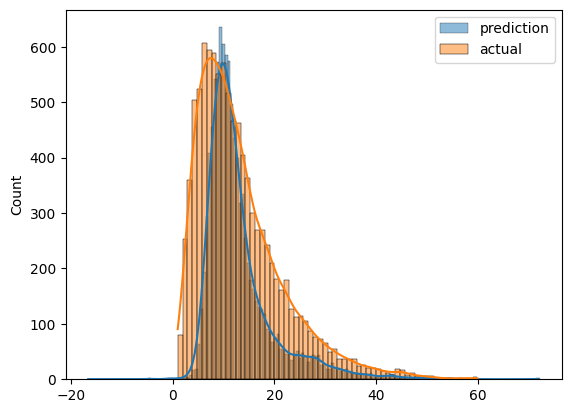

In [137]:
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual',  kde=True)


plt.legend()

In [132]:
mean_squared_error(y_train, y_pred, squared=False)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(4.990721108250688)

## Now we are going to try to use Lasso linear regression

In [46]:
from sklearn.linear_model import Lasso

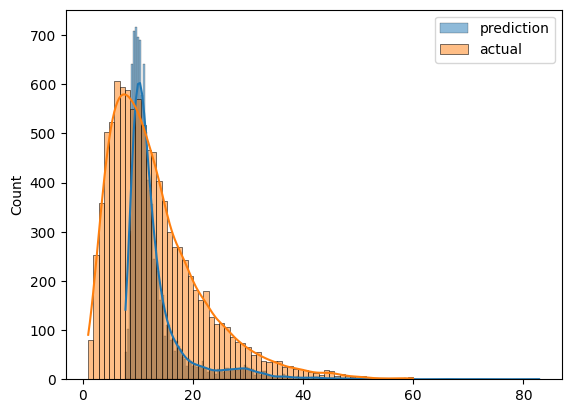

In [141]:
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual',  kde=True)


plt.legend()

In [38]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >=1) & (df.duration <=60)]
    categorical = ['PULocationID', 'DOLocationID']
    
    #limiting the number of records b/c of 2M in the file
    #df = df.sample(n=1000000, random_state=42)
    
    df[categorical] = df[categorical].astype(str)

    return df
    
    

In [35]:
# df_train = read_dataframe('./data/yellow_tripdata_2024-01.parquet')
# df_val = read_dataframe('./data/yellow_tripdata_2024-02.parquet')

In [36]:
# len(df_train), len(df_val)

In [40]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df_train = read_dataframe(data_dir / 'yellow_tripdata_2024-01.parquet')
df_val = read_dataframe(data_dir / 'yellow_tripdata_2024-02.parquet')

dv=DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [41]:
target='duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [51]:
with mlflow.start_run():

    mlflow.set_tag("developer", "AK")
    mlflow.log_param('alpha', alpha)
    mlflow.log_param('train_data_path', data_dir / 'yellow_tripdata_2024-01.parquet')
    mlflow.log_param('val_data_path', data_dir / 'yellow_tripdata_2024-02.parquet')
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse=mean_squared_error(y_val, y_pred, squared=False)
    
    mlflow.log_metric('rmse', rmse)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
with mlflow.start_run():

    alpha=0.1
    
    mlflow.set_tag("developer", "AK")
    mlflow.log_param('alpha', alpha)
    mlflow.log_param('train_data_path', data_dir / 'yellow_tripdata_2024-01.parquet')
    
    lr = Lasso(alpha = alpha)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Try Ridge regression

In [183]:
from sklearn.linear_model import Ridge

In [186]:
lr = Ridge(alpha=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(8.119734394240226)

## Let's combine features

In [203]:
df_train['PU_DO'] = df_train['PULocationID']+'_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID']+'_' + df_val['DOLocationID']

In [188]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,PU_DO
1876103,1,2024-02-20 17:16:30,2024-02-20 17:32:48,1.0,1.30,1.0,N,163,141,1,...,5.0,0.5,4.00,0.0,1.0,24.00,2.5,0.00,16.300000,163_141
2758378,2,2024-02-29 15:11:05,2024-02-29 15:26:08,6.0,1.63,1.0,N,158,231,1,...,0.0,0.5,3.64,0.0,1.0,21.84,2.5,0.00,15.050000,158_231
2246111,2,2024-02-24 10:22:07,2024-02-24 10:30:21,1.0,0.92,1.0,N,186,246,2,...,0.0,0.5,0.00,0.0,1.0,13.30,2.5,0.00,8.233333,186_246
1150017,2,2024-02-12 17:39:16,2024-02-12 17:50:18,1.0,2.27,1.0,N,43,163,1,...,2.5,0.5,4.00,0.0,1.0,24.00,2.5,0.00,11.033333,43_163
1165075,2,2024-02-12 20:31:53,2024-02-12 20:58:37,1.0,10.32,1.0,N,132,36,1,...,2.5,0.5,9.38,0.0,1.0,58.03,0.0,1.75,26.733333,132_36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906541,2,2024-02-16 22:21:28,2024-02-16 22:35:47,NaN,5.58,NaN,None,151,243,0,...,0.0,0.5,0.00,0.0,1.0,22.71,NaN,NaN,14.316667,151_243
2798311,2,2024-02-29 20:01:02,2024-02-29 20:08:02,1.0,0.85,1.0,N,163,229,1,...,1.0,0.5,1.94,0.0,1.0,14.84,2.5,0.00,7.000000,163_229
2095262,2,2024-02-22 19:42:38,2024-02-22 19:55:31,1.0,2.51,1.0,N,230,236,1,...,2.5,0.5,5.35,0.0,1.0,26.75,2.5,0.00,12.883333,230_236
852925,2,2024-02-09 17:17:42,2024-02-09 17:27:21,1.0,1.58,1.0,N,25,40,1,...,2.5,0.5,2.94,0.0,1.0,17.64,0.0,0.00,9.650000,25_40


In [204]:
categorical = ['PU_DO']
numerical = ['trip_distance']

dv=DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [205]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(5.505678270314269)

In [192]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

/home/alex/.local/share/virtualenvs/mlops-homework-Kw-cColU/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(9.566534876550083)

## Let's save the model

In [ ]:
import pickle

In [206]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)